In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import joblib

In [139]:
args = {
    "dataset": "confidential/train150.txt",
    "model": "out/wind_speed_nn.model",
    "plot": "out/wind_speed_plot.png",
    "norm": "out/wind_speed_norm"
}

In [140]:
np.random.seed(8)

In [141]:
dataframe = pd.read_csv(args["dataset"], delimiter="\t", header=None)
dataset = dataframe.values

In [142]:
X = dataset[:-1]
Y = dataset[1:, 4]

In [143]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(X_train, X_test, Y_train, Y_test) = train_test_split(
    X, Y, test_size=0.25, random_state=42
)

In [144]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# save scale of x
joblib.dump(scaler, "{}_x.joblib".format(args["norm"]))

['out/wind_speed_norm_x.joblib']

In [145]:
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler.transform(Y_test.reshape(-1, 1))

# save scale of y
joblib.dump(scaler, "{}_y.joblib".format(args["norm"]))

['out/wind_speed_norm_y.joblib']

In [146]:
# define the 9-9-6-1 architecture using tf.keras
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9, input_shape=(9,), activation="tanh"))
model.add(tf.keras.layers.Dense(9, activation="tanh"))
model.add(tf.keras.layers.Dense(6, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="linear"))

In [147]:
# initialize our initial learning rate and # of epochs to train for
# INIT_LR = 0.01
EPOCHS = 30

# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
# opt = tf.keras.optimizers.SGD(lr=INIT_LR)
model.compile(loss="mse", optimizer="sgd", metrics=["mae", "mse"])

# train the neural network
H = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=1,
)

[INFO] training network...
Train on 411 samples, validate on 138 samples
Epoch 1/30
411/411 [==============================] - 2s 6ms/sample - loss: 0.0241 - mean_absolute_error: 0.1201 - mean_squared_error: 0.0241 - val_loss: 0.0195 - val_mean_absolute_error: 0.1154 - val_mean_squared_error: 0.0195
Epoch 2/30
411/411 [==============================] - 2s 4ms/sample - loss: 0.0147 - mean_absolute_error: 0.0945 - mean_squared_error: 0.0147 - val_loss: 0.0126 - val_mean_absolute_error: 0.0920 - val_mean_squared_error: 0.0126
Epoch 3/30
411/411 [==============================] - 2s 4ms/sample - loss: 0.0136 - mean_absolute_error: 0.0930 - mean_squared_error: 0.0136 - val_loss: 0.0104 - val_mean_absolute_error: 0.0837 - val_mean_squared_error: 0.0104
Epoch 4/30
411/411 [==============================] - 2s 4ms/sample - loss: 0.0129 - mean_absolute_error: 0.0897 - mean_squared_error: 0.0129 - val_loss: 0.0158 - val_mean_absolute_error: 0.1014 - val_mean_squared_error: 0.0158
Epoch 5/30
411/

In [148]:
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print(
    "{}: {}\n{}: {}".format(
        model.metrics_names[1], scores[1], model.metrics_names[2], scores[2]
    )
)

138/138 [==============================] - 0s 141us/sample - loss: 0.0093 - mean_absolute_error: 0.0784 - mean_squared_error: 0.0093
mean_absolute_error: 0.07837072759866714
mean_squared_error: 0.00925223995000124


In [149]:
# evaluate the model
# print("[INFO] evaluating network...")
# predictions = model.predict(testX, batch_size=1)
# print(
#     classification_report(
#         testY.argmax(axis=1),
#         predictions.argmax(axis=1),
#         target_names=lb.classes_,
#     )
# )

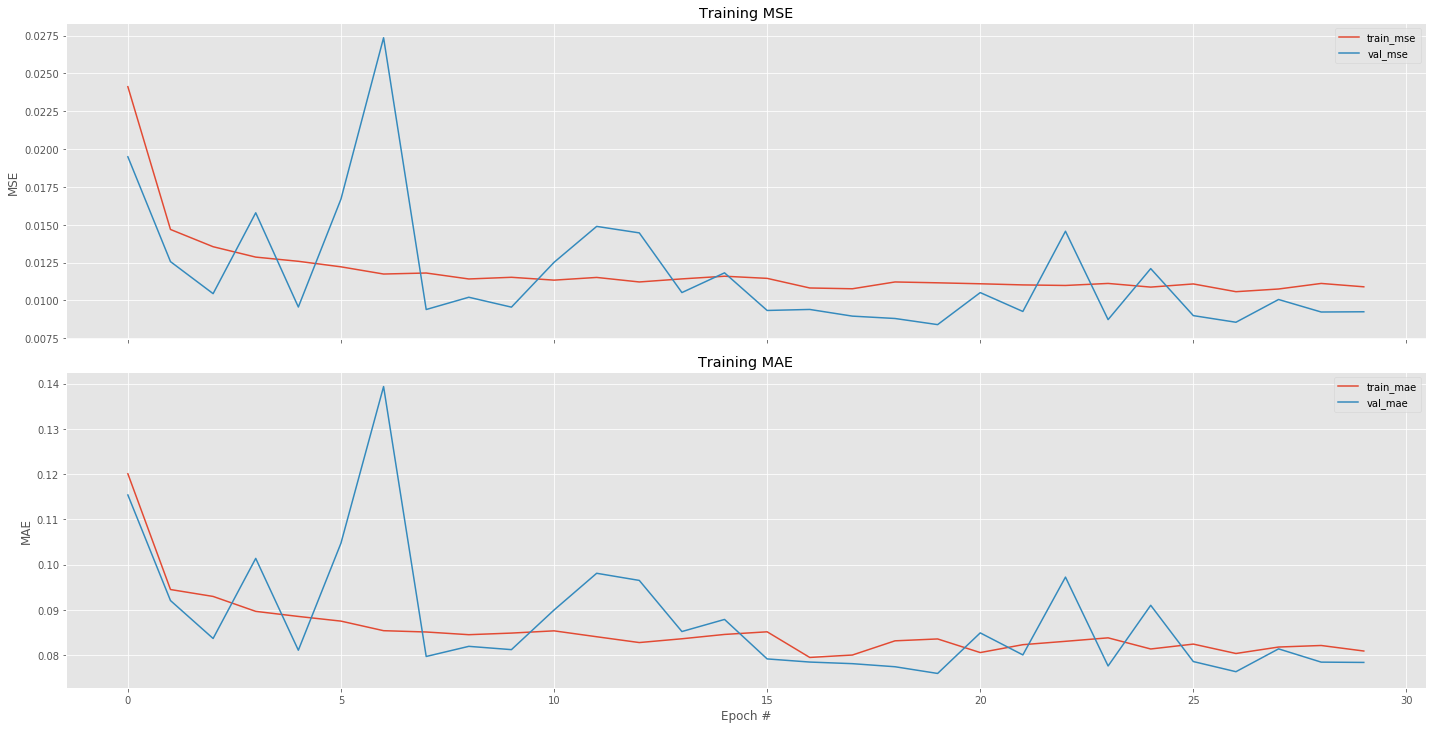

In [150]:
# plot the training loss, MAE and MSE
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
_, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(N, H.history["mean_squared_error"], label="train_mse")
axs[0].plot(N, H.history["val_mean_squared_error"], label="val_mse")
axs[0].set_title("Training MSE")
axs[0].set_ylabel("MSE")
axs[0].legend()
axs[1].plot(N, H.history["mean_absolute_error"], label="train_mae")
axs[1].plot(N, H.history["val_mean_absolute_error"], label="val_mae")
axs[1].set_title("Training MAE")
axs[1].set_ylabel("MAE")
axs[1].legend()
plt.tight_layout()
plt.xlabel("Epoch #")
plt.savefig(args["plot"])

In [151]:
# save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])

[INFO] serializing network...
